#Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the data

In [2]:
data_df = pd.read_csv('/content/Folds5x2_pp.csv')
data_df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


#Checking for null values

In [3]:
data_df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

# Extracting features (X) and target variable (y)

In [4]:
X = data_df[['AT', 'V', 'AP']].values
y = data_df[['PE']].values

# Normalize the data

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Adding a column of ones for the intercept term

In [7]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Reshape y_train to be a 2D array

In [8]:
y_train = y_train.reshape(-1, 1)

# Function to perform multiple linear regression

In [9]:
def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros((n, 1))  # Initialize weights with zeros
    cost_list = []

    # Gradient descent
    for i in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

# Train the model

In [10]:
learning_rate = 0.01
epochs = 1000
weights, cost_list = linear_regression(X_train, y_train, learning_rate, epochs)

# Plot the cost function

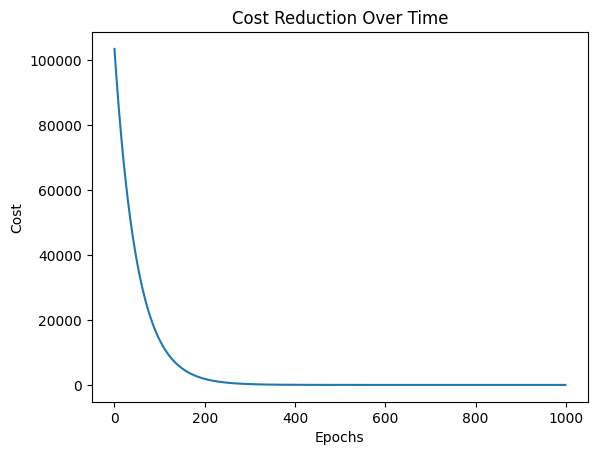

In [11]:
# Plot the cost function
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.show()


# Predict on the test set

In [12]:
y_pred_test = np.dot(X_test, weights)

# Ensure y_pred_test is flattened for consistency

In [13]:
y_pred_test = y_pred_test.flatten()

#Defining and calculating the metrics

In [14]:
mse = np.mean((y_test - y_pred_test.flatten())**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test.flatten()))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 556.683788736567
Root Mean Squared Error (RMSE): 23.594147340740392
Mean Absolute Error (MAE): 19.20591181742219
R-squared: 0.9993312222949464


# Check lengths

In [15]:
print(f'y_test shape: {y_test.shape}')
print(f'y_pred_test shape: {y_pred_test.shape}')
print(f'y_pred_test flattened shape: {y_pred_test.flatten().shape}')

y_test shape: (2871, 1)
y_pred_test shape: (2871,)
y_pred_test flattened shape: (2871,)


# Create the DataFrame if lengths match

In [21]:
y_test = y_test.flatten()
y_pred_test = y_pred_test.flatten()

if len(y_test) == len(y_pred_test):
    results_df = pd.DataFrame({
        'Actual Values': y_test,
        'Predicted Values': y_pred_test,
        'Difference (Actual - Predicted)': y_test - y_pred_test
    })
    print(results_df)
else:
    print("Lengths of actual and predicted values don't match.")

      Actual Values  Predicted Values  Difference (Actual - Predicted)
0            426.18        434.516358                        -8.336358
1            451.10        449.896660                         1.203340
2            442.87        443.573586                        -0.703586
3            443.70        447.303107                        -3.603107
4            460.59        459.903418                         0.686582
...             ...               ...                              ...
2866         440.27        441.816716                        -1.546716
2867         438.42        441.887436                        -3.467436
2868         442.88        443.627821                        -0.747821
2869         456.64        457.647006                        -1.007006
2870         478.19        473.283551                         4.906449

[2871 rows x 3 columns]


# Plot actual vs predicted values

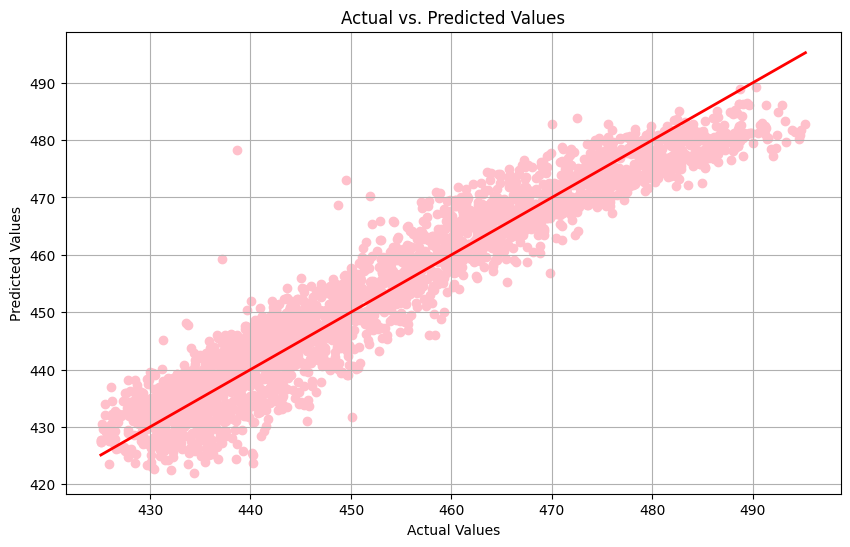

'In the above code we use min and max values as we get a diagonal line\n from the minimum actual value to the maximum actual value.'

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='pink')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()
'''In the above code we use min and max values as we get a diagonal line
 from the minimum actual value to the maximum actual value.'''